# Part B
Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

## Overall Findings

<div class="alert alert-block alert-info" style="margin-top: 20px">

### Summary of mean and standard deviation of MSE 

|            *              |  Part A  |  Part B  |  Part C  |  Part D  |
|---------------------------|----------|----------|----------|----------|
| Mean of MSE               | 265.3690   | 904.2639    | 630.1834  | 321.6400 |
| Standard Deviation of MSE | 169.2189  | 362.2746   | 461.4690 | 357.9270 |
    
</div>

## Findings: Part B
<div class="alert alert-block alert-info" style="margin-top: 20px">

### How does the mean of the mean squared errors (MSE) compare to that from Part A?
Mean of MSE is lower in Part A (265.37) compared to Part B(904.27)
    
</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#Check number of data points
concrete_data.shape

(1030, 9)

In [4]:
#Statistical description of data
concrete_data.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
#Split data into predictors & target
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [6]:
#Check Predictors
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
#Check target
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

# 1. Normalize Data
Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

In [25]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [9]:
#number of predictors
ncols = predictors_norm.shape[1] 

## 2. Randomly split the data into a training (70%) & test set (30%)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42)

## 3. Compute the mean squared error between the predicted and actual concrete strength. 
Here, Keras backend was used to calculate mean_squared_error at the end of each batch/epoch

In [11]:
#Compute the mean squared error between the predicted and actual concrete strength
import keras.backend as K

def mse(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

Using TensorFlow backend.


## 4. Build a neural network with:
- Hidden Layer: 1
- Nodes in hidden layer: 10
- Activation function: ReLU
- Optimizer: adam
- Loss Function: mean squared error

In [12]:
#Build a Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense

# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(ncols,)))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mse])
    return model

In [13]:
# build the model
model = regression_model()

Instructions for updating:
Colocations handled automatically by placer.


## 5. Model training and Evaluation
Train the model on the the training data using 50 epochs. Evaluate the model on the test data 

In [14]:
# fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 10s - loss: 1561.9248 - mse: 1561.9248 - val_loss: 1465.4124 - val_mse: 1465.4124
Epoch 2/50
 - 1s - loss: 1543.6174 - mse: 1543.6174 - val_loss: 1449.9941 - val_mse: 1449.9941
Epoch 3/50
 - 1s - loss: 1525.4272 - mse: 1525.4272 - val_loss: 1434.4513 - val_mse: 1434.4513
Epoch 4/50
 - 1s - loss: 1507.4594 - mse: 1507.4594 - val_loss: 1418.6884 - val_mse: 1418.6884
Epoch 5/50
 - 1s - loss: 1488.8756 - mse: 1488.8756 - val_loss: 1403.5430 - val_mse: 1403.5430
Epoch 6/50
 - 5s - loss: 1470.7115 - mse: 1470.7115 - val_loss: 1387.0233 - val_mse: 1387.0233
Epoch 7/50
 - 6s - loss: 1451.2728 - mse: 1451.2728 - val_loss: 1369.9736 - val_mse: 1369.9736
Epoch 8/50
 - 1s - loss: 1431.4143 - mse: 1431.4143 - val_loss: 1351.7898 - val_mse: 1351.7898
Epoch 9/50
 - 1s - loss: 1410.2165 - mse: 1410.2165 - val_loss: 1333.0473 - val_mse: 1333.0473
Epoch 10/50
 - 1s - loss: 1388.4634 - mse: 1388.46

## 6. Model Evaluation
Evaluate the model on the test data. 

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \nError: {}".format(score[1], 1-score[1]))

Accuracy: 359.61957636465917 
Error: -358.61957636465917


## 7. Report the mean and standard deviation of the Mean Squared Errors (MSE)

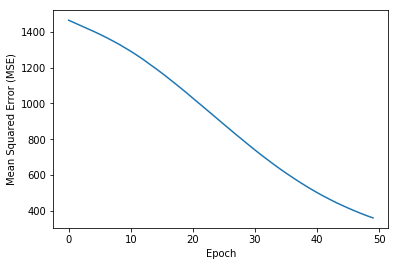

In [18]:
from matplotlib import pyplot
pyplot.plot(hist.history['val_mse'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error (MSE)')

pyplot.show()

In [19]:
import statistics
mse_mean = statistics.mean(hist.history['val_mse'])
mse_stdev = statistics.stdev(hist.history['val_mse'])

print("Mean of MSE: {:.4f} \nStandard Deviation of MSE: {:.4f}".format(mse_mean, mse_stdev))

Mean of MSE: 904.2639 
Standard Deviation of MSE: 362.2746


## Overall Findings

<div class="alert alert-block alert-info" style="margin-top: 20px">

### Summary of mean and standard deviation of MSE 

|            *              |  Part A  |  Part B  |  Part C  |  Part D  |
|---------------------------|----------|----------|----------|----------|
| Mean of MSE               | 265.3690   | 904.2639    | 630.1834  | 321.6400 |
| Standard Deviation of MSE | 169.2189  | 362.2746   | 461.4690 | 357.9270 |
    
</div>

## Findings: Part B
<div class="alert alert-block alert-info" style="margin-top: 20px">

### How does the mean of the mean squared errors (MSE) compare to that from Part A?
Mean of MSE is lower in Part A (265.37) compared to Part B(904.27)
    
</div>